In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

Grupo Hotusa - Data Analyst/Scientist test.
Tarea para candidatos que aplican a un puesto de Data Analyst/Scientist en Grupo Hotusa.

Descripción de la tarea
El dataset (clients_analysis.csv) con el que trabajar contiene las siguientes columnas:

id_secuencial: Id de Cliente (valor entero).

Idioma: Idioma con el que dirigirse al cliente.

genero: Género del cliente.

tratamiento: Forma de dirigirse al cliente.

alta_cliente: Fecha de alta del cliente.

comunicaciones_comerciales: Si el cliente permite comunicaciones comerciales o no.

alta_comunicaciones: Fecha en la que el cliente aceptó las comunicaciones comerciales.

nivel_fidelizacion: Nivel en el programa de fidelización de la empresa del cliente.

alta_fidelizacion: Fecha en la que el cliente se dio de alta en el programa de fidelización.

fecha_nacimiento: Fecha de nacimiento del cliente.

mail: Si el cliente tiene un mail informado en su ficha de cliente o no.

Total_Reservation: Número total de reservas del cliente.

media_estancia: Duración media de las estancias del cliente.

antelacion_media: Antelación media con la que se hacen las reservas.

facturacion: Total de facturación del cliente.

Canal_reserva: Canal de reserva más habitual del cliente.

Motivo_viaje: Motivo del viaje/Segmento.

ultima_reserva: Fecha de la última reserva.

n_hoteles_distintos: Número de hoteles distintos en los que se ha alojado el cliente.

acompanante: Acompañante más recurrente en sus reservas.

Debes crear un report reproducible (en un notebook en Python o R) siguiendo estos pasos:

Estandarización y limpieza: Puedes observar que el csv está desordenado, las columnas no tienen una estándar en cuanto a la nomenclatura y los valores, en su mayoría, ni siquiera tienen un formato adecuado. Esto se debe a que se han recogido datos de varias fuentes diferentes. Desde el departamento de Marketing quieren usar esta información de manera que les sea sencillo filtrar y extraer los clientes a los que impactar en comunicaciones comerciales. ¿Qué tipo de limpieza, agrupaciones o estandarizaciones piensas que podrían hacerse? Realiza los que creas de importancia. [Ejemplo: transformar la columna 'mail' en booleano, estandarizar los nombres de las columnas a un único idioma, etc.]





EDA: ¿Existen columnas que no sean útiles? ¿Crees que podemos extraer alguna otra nueva? Haz un breve análisis descriptivo de los datos. Propón y realiza un par de análisis que te parezcan interesantes en cuanto a los clientes.





Propuesta de campañas: Sabiendo que queremos, por un lado, agradecer a los clientes más 'top' y, por otro, llamar la atención de aquellos clientes que creemos potenciales para que sean recurrentes en un futuro, ¿cómo identificarías o segmentarías los clientes más top? ¿Y los potenciales clientes recurrentes? ¿Qué variables echas en falta para poder afinar tu segmentación? ¿Cuáles serían tus resultados?





Modelo predictivo: Al margen de las campañas de marketing, ¿qué otro tipo de valor le darías a estos datos? ¿Qué modelo predictivo podrías crear alrededor de los clientes? ¿Sabrías cómo hacerlo?
Se valorarán las explicaciones y insights que se detecten como también que las gráficas y los resultados sean fáciles de leer. No se trata de escupir los datos, sino contar una historia con ellos. Este report lo debería poder leer tanto un perfil técnico como un perfil de negocio.

In [3]:
df = pd.read_csv("./data/clients_analysis.csv") 

Cambio de idioma de todos los titulos de columna para unificar en ingles


In [4]:
df.columns = [
    'sequential_id', 'language', 'gender', 'treatment', 'customer_signup',
    'country', 'commercial_communications', 'communications_signup',
    'loyalty_level', 'loyalty_signup', 'birth_date', 'email',
    'total_reservations', 'average_stay', 'average_advance_booking',
    'billing', 'reservation_channel', 'travel_reason', 'last_reservation',
    'different_hotels', 'companion'
]

Columnas con muchos valores nulos:


commercial_communications: Tiene muchos valores nulos (93,912 de 100,000). Aunque esta columna es importante, podríamos considerar eliminarla si no podemos obtener información confiable. Sin embargo, es mejor mantenerla y explorar su impacto.


communications_signup: Similar a la columna anterior, está relacionada y tiene muchos valores nulos.


loyalty_level y loyalty_signup: Tienen muchos valores nulos pero son importantes para el análisis de fidelización.

In [5]:
df["billing"].value_counts()

billing
0                 660
147,6             132
134,18181848      109
87,21818152        98
82                 92
                 ... 
372,85550716        1
287,3879451564      1
1.091,32756632      1
91,04236304         1
815,6465462         1
Name: count, Length: 41387, dtype: int64

In [6]:
#df = df.drop(columns=['loyalty_signup','commercial_communications', 'communications_signup','loyalty_level'])

In [7]:
df.head()

,sequential_id,language,gender,treatment,customer_signup,country,commercial_communications,communications_signup,loyalty_level,loyalty_signup,...,email,total_reservations,average_stay,average_advance_booking,billing,reservation_channel,travel_reason,last_reservation,different_hotels,companion
0,5.715.578,S,hombre,Señor,2022-03-08,ES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN
1,2.931.815,I,mujer,Señora,2023-04-15,IT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN
2,5.246.485,P,mujer,Señora,2022-05-25,BR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN
3,3.084.602,S,hombre,Señor,2023-03-25,ES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN
4,32.943,S,mujer,Señora,2024-04-27,MX,X,2024-06-10,bajo,2024-04-26,...,MAIL,1.0,1.0,0.0,"118,8971041652",Indirecto,LEISURE,2024-04-27,1.0,Pareja


Completo con otros los nulos de la columna gender

In [8]:
df["gender"].value_counts()

gender
hombre    51219
mujer     48343
Name: count, dtype: int64

In [9]:
df["gender"] = df["gender"].fillna("Otro")

In [10]:
df["gender"].value_counts()

gender
hombre    51219
mujer     48343
Otro        438
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  98698 non-null   object 
 4   customer_signup            100000 non-null  object 
 5   country                    99995 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      26605 non-null   object 
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

Trato de completar y unificar la columna treatment

In [12]:
df["treatment"].value_counts()

treatment
Señor             43643
Señora            41512
Mr.                6705
Ms.                5666
Señor / Señora     1003
Mr. / Mrs.          130
Empresa              17
Turismo              10
Agencia               9
Company               3
Name: count, dtype: int64

Voy a unificar los valores en Señor, Señora, Señor y Señora, Agencia, Empresa. 

In [13]:
treatment_map = {
    'Mr.': 'Señor',
    'Ms.': 'Señora',
    'Mr. / Mrs.': 'Señor / Señora',
    'Turismo': 'Agencia',
    'Company': 'Empresa',
    # Añadir más mapeos si es necesario
}

# Aplicar el mapeo a la columna 'treatment'
df['treatment'] = df['treatment'].replace(treatment_map)

# Verificar los cambios realizados
df['treatment'].value_counts()


treatment
Señor             50348
Señora            47178
Señor / Señora     1133
Empresa              20
Agencia              19
Name: count, dtype: int64

In [14]:
# Filtrar las filas donde 'treatment' es nulo
filas_treatment_nulo = df[df['treatment'].isnull()]

# Obtener la distribución de valores en 'gender' cuando 'treatment' es nulo
gender_counts = filas_treatment_nulo['gender'].value_counts()

# Mostrar los resultados
print(gender_counts)


gender
hombre    515
Otro      436
mujer     351
Name: count, dtype: int64


In [15]:


# Filtrar y asignar valores en 'treatment' basado en los valores de 'gender'
df.loc[(df['treatment'].isnull()) & (df['gender'] == 'hombre'), 'treatment'] = 'Señor'
df.loc[(df['treatment'].isnull()) & (df['gender'] == 'mujer'), 'treatment'] = 'Señora'
df.loc[(df['treatment'].isnull()) & ~(df['gender'].isin(['hombre', 'mujer'])), 'treatment'] = 'Otro'

# Verificar los cambios
print(df[df['treatment'].isnull()])  # No debería haber filas nulas en 'treatment'
print(df['treatment'].value_counts())




Empty DataFrame
Columns: [sequential_id, language, gender, treatment, customer_signup, country, commercial_communications, communications_signup, loyalty_level, loyalty_signup, birth_date, email, total_reservations, average_stay, average_advance_booking, billing, reservation_channel, travel_reason, last_reservation, different_hotels, companion]
Index: []

[0 rows x 21 columns]
treatment
Señor             50863
Señora            47529
Señor / Señora     1133
Otro                436
Empresa              20
Agencia              19
Name: count, dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99995 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      26605 non-null   object 
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [17]:
df["reservation_channel"].value_counts()

reservation_channel
Error              40622
Indirecto          38628
Directo            18107
Mixto Directo       1495
Mixto Indirecto     1133
Mixto                 15
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99995 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      26605 non-null   object 
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [19]:
df["language"].value_counts()

language
S    42649
E    20174
P     7183
F     6073
I     5977
D     5708
N     1537
A     1413
1     1175
B      928
3      828
4      826
L      754
T      526
V      464
R      464
H      360
G      358
K      348
6      337
C      337
O      329
U      269
J      239
Q      202
5      166
M      113
2       65
8       62
c       26
X       20
Y       19
W       16
b       15
7       13
i        7
a        7
0        6
9        2
d        2
Z        1
Name: count, dtype: int64

In [20]:
df["country"].value_counts()

country
ES    34573
US     6291
IT     6210
PT     5392
FR     5250
      ...  
PG        1
TD        1
UM        1
ZW        1
VU        1
Name: count, Length: 205, dtype: int64

In [21]:
country_counts_by_language = {}
# Iterar sobre los valores únicos de 'language'
for lang in df['language'].unique():
    # Filtrar el DataFrame por el valor actual de 'language'
    filtered_df = df[df['language'] == lang]
    # Obtener el conteo de valores de 'country' para el valor actual de 'language'
    country_counts = filtered_df['country'].value_counts()
    # Almacenar los resultados en el diccionario
    country_counts_by_language[lang] = country_counts

# Mostrar los resultados
for lang, counts in country_counts_by_language.items():
    print(f"Language: {lang}")
    print(counts)
    print("\n")

Language: S
country
ES    34478
MX     1658
AR     1457
CO      870
CL      371
      ...  
DM        1
AG        1
RC        1
NP        1
BH        1
Name: count, Length: 121, dtype: int64


Language: I
country
IT    5839
BR      14
US      11
GB      10
CH       9
RO       7
AR       5
BE       5
MA       5
SM       4
GR       4
IN       3
DE       3
CN       3
FR       3
IL       3
KR       3
SE       2
UA       2
AM       2
VA       2
AL       2
MX       2
AU       2
NL       2
DK       2
VE       2
ES       2
LU       1
CA       1
CL       1
KW       1
IE       1
HR       1
AT       1
EC       1
IR       1
SG       1
SA       1
LY       1
EE       1
PH       1
PA       1
DZ       1
CO       1
NZ       1
TW       1
PT       1
RS       1
RU       1
MY       1
DO       1
Name: count, dtype: int64


Language: P
country
PT    5169
BR    1839
AO      61
CV      15
FR      10
GW      10
US       8
LU       7
ES       7
ST       5
DE       4
CH       4
AD       3
GB       3
PY       3
PR

In [22]:
df2 = pd.read_csv("./data/paises.csv")

In [23]:
df2

,name,nombre,iso
0,Andorra,Andorra,AD
1,United Arab Emirates,Emiratos Árabes Unidos,AE
2,Afghanistan,Afganistán,AF
3,Antigua and Barbuda,Antigua y Barbuda,AG
4,Anguilla,Anguila,AI
...,...,...,...
233,Yugoslavia,Yugoslavia,YU
234,South Africa,Sudáfrica,ZA
235,Zambia,Zambia,ZM
236,Zaire,Zaire,ZR


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99995 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      26605 non-null   object 
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [25]:
country_counts_by_language = {}
# Iterar sobre los valores únicos de 'language'
for lang in df['language'].unique():
    # Filtrar el DataFrame por el valor actual de 'language'
    filtered_df = df[df['language'] == lang]
    # Obtener el conteo de valores de 'country' para el valor actual de 'language'
    country_counts = filtered_df['country'].value_counts()
    # Almacenar los resultados en el diccionario
    country_counts_by_language[lang] = country_counts

# Mostrar los resultados
for lang, counts in country_counts_by_language.items():
    print(f"Language: {lang}")
    print(counts)
    print("\n")

Language: S
country
ES    34478
MX     1658
AR     1457
CO      870
CL      371
      ...  
DM        1
AG        1
RC        1
NP        1
BH        1
Name: count, Length: 121, dtype: int64


Language: I
country
IT    5839
BR      14
US      11
GB      10
CH       9
RO       7
AR       5
BE       5
MA       5
SM       4
GR       4
IN       3
DE       3
CN       3
FR       3
IL       3
KR       3
SE       2
UA       2
AM       2
VA       2
AL       2
MX       2
AU       2
NL       2
DK       2
VE       2
ES       2
LU       1
CA       1
CL       1
KW       1
IE       1
HR       1
AT       1
EC       1
IR       1
SG       1
SA       1
LY       1
EE       1
PH       1
PA       1
DZ       1
CO       1
NZ       1
TW       1
PT       1
RS       1
RU       1
MY       1
DO       1
Name: count, dtype: int64


Language: P
country
PT    5169
BR    1839
AO      61
CV      15
FR      10
GW      10
US       8
LU       7
ES       7
ST       5
DE       4
CH       4
AD       3
GB       3
PY       3
PR

In [26]:
language_meanings = {
    'S': 'Spanish',
    'I': 'Italian',
    'P': 'Portuguese',
    'E': 'English',
    'T': 'Turkish',
    'L': 'Latvian',
    'D': 'German',
    '4': 'Romanian/Moldovan',
    'A': 'Arabic',
    'Q': 'Slovak',
    'U': 'Finnish',
    '1': 'Chinese',
    'N': 'Dutch',
    'F': 'French',
    'M': 'Mandarin',
    '6': 'Croatian/Bosnian',
    'J': 'Japanese',
    'G': 'Greek',
    'C': 'Czech',
    'K': 'Danish',
    '3': 'Korean',
    'B': 'Hebrew',
    'R': 'Russian',
    '5': 'Slovenian',
    'c': 'Catalan',
    'H': 'Hungarian',
    'V': 'Swedish',
    '9': 'Estonian',
    'O': 'Norwegian',
    'W': 'Unknown',
    'X': 'Lithuanian',
    '2': 'Thai',
    '8': 'Ukrainian',
    'b': 'Icelandic',
    '7': 'Malay/Singaporean',
    'i': 'Indonesian',
    '0': 'Argentinian',
    'Y': 'Latvian/Lithuanian',
    'nan': 'Unknown',
    'a': 'Mixed/Other',
    'd': 'Unknown',
    'Z': 'Armenian'
}

df['language_name'] = df['language'].map(language_meanings)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99995 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      26605 non-null   object 
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [28]:
df['email'] = df['email'].apply(lambda x: True if x == 'MAIL' else False)



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99995 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      100000 non-null  bool   
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [30]:
null_country_rows = df[df['country'].isnull()]
null_country_rows

,sequential_id,language,gender,treatment,customer_signup,country,commercial_communications,communications_signup,loyalty_level,loyalty_signup,...,total_reservations,average_stay,average_advance_booking,billing,reservation_channel,travel_reason,last_reservation,different_hotels,companion,language_name
24960,3.941.567,NaN,Otro,Otro,2022-11-06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN,NaN
63111,1.926.581,E,mujer,Señora,2023-08-16,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,182.0,"214,6909076",Indirecto,BT,2023-08-18,1.0,Individual,English
64026,2.590.655,E,mujer,Señora,2023-05-29,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,"194,04181684",Indirecto,BT,2023-05-31,1.0,Individual,English
72140,5.762.653,E,hombre,Señor,2022-02-26,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,4.0,"371,236304",Indirecto,OTHER,2022-03-04,1.0,Individual,English
81756,1.903.863,E,mujer,Señora,2023-08-18,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,38.0,"464,13454352",Indirecto,MIXTO,2023-08-25,1.0,Individual,English


In [31]:
df.loc[df['language_name'] == 'English', 'country'] = df.loc[df['language_name'] == 'English', 'country'].fillna('US')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99999 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      100000 non-null  bool   
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [33]:
null_l_rows = df[df['language_name'].isnull()]
null_l_rows

,sequential_id,language,gender,treatment,customer_signup,country,commercial_communications,communications_signup,loyalty_level,loyalty_signup,...,total_reservations,average_stay,average_advance_booking,billing,reservation_channel,travel_reason,last_reservation,different_hotels,companion,language_name
23940,2.727.873,NaN,hombre,Señor,2023-05-12,KR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN,NaN
24960,3.941.567,NaN,Otro,Otro,2022-11-06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Error,NaN,NaN,NaN,NaN,NaN


In [34]:
df.loc[df['country'] == 'KR', 'country'] = df.loc[df['country'] == 'KR', 'language'].fillna('Korea')
df.loc[df['country'] == 'KR', 'country'] = df.loc[df['country'] == 'KR', 'language_name'].fillna('Korean')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   language                   99998 non-null   object 
 2   gender                     100000 non-null  object 
 3   treatment                  100000 non-null  object 
 4   customer_signup            100000 non-null  object 
 5   country                    99999 non-null   object 
 6   commercial_communications  6088 non-null    object 
 7   communications_signup      6088 non-null    object 
 8   loyalty_level              1750 non-null    object 
 9   loyalty_signup             1481 non-null    object 
 10  birth_date                 99674 non-null   object 
 11  email                      100000 non-null  bool   
 12  total_reservations         59378 non-null   float64
 13  average_stay               588

In [36]:
df = df.drop(columns=["language"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   gender                     100000 non-null  object 
 2   treatment                  100000 non-null  object 
 3   customer_signup            100000 non-null  object 
 4   country                    99999 non-null   object 
 5   commercial_communications  6088 non-null    object 
 6   communications_signup      6088 non-null    object 
 7   loyalty_level              1750 non-null    object 
 8   loyalty_signup             1481 non-null    object 
 9   birth_date                 99674 non-null   object 
 10  email                      100000 non-null  bool   
 11  total_reservations         59378 non-null   float64
 12  average_stay               58828 non-null   float64
 13  average_advance_booking    589

In [37]:
df["reservation_channel"].value_counts()

reservation_channel
Error              40622
Indirecto          38628
Directo            18107
Mixto Directo       1495
Mixto Indirecto     1133
Mixto                 15
Name: count, dtype: int64

In [38]:
df["email"].value_counts()

email
False    73395
True     26605
Name: count, dtype: int64

In [39]:
for i in df.columns:
    print(df[i].value_counts())
    print("XXXXXXXXXXXXXXXX")

sequential_id
5.715.578    1
3.218.516    1
3.627.104    1
5.551.956    1
1.822.308    1
            ..
3.142.425    1
2.498.335    1
2.391.370    1
3.076.195    1
2.165.697    1
Name: count, Length: 100000, dtype: int64
XXXXXXXXXXXXXXXX
gender
hombre    51219
mujer     48343
Otro        438
Name: count, dtype: int64
XXXXXXXXXXXXXXXX
treatment
Señor             50863
Señora            47529
Señor / Señora     1133
Otro                436
Empresa              20
Agencia              19
Name: count, dtype: int64
XXXXXXXXXXXXXXXX
customer_signup
2023-04-29    236
2022-04-14    228
2022-08-12    202
2023-08-14    202
2022-08-13    200
             ... 
2022-01-20     36
2022-02-02     35
2022-01-18     32
2022-01-24     32
2022-01-11     30
Name: count, Length: 850, dtype: int64
XXXXXXXXXXXXXXXX
country
ES       34573
US        6295
IT        6210
PT        5392
FR        5250
         ...  
VC           1
UM           1
Korea        1
PG           1
VU           1
Name: count, Length: 213

#### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [40]:
# Convertir 'total_reservations' a tipo entero
df['total_reservations'] = df['total_reservations'].fillna(0).astype(int)

# Convertir 'average_stay' a tipo entero
df['average_stay'] = df['average_stay'].fillna(0).astype(int)

# Redondear 'billing' a 2 decimales
# Primero, debemos asegurarnos de que 'billing' sea de tipo numérico (float)
df['billing'] = df['billing'].str.replace('.', '')  # Remover puntos de miles
df['billing'] = df['billing'].str.replace(',', '.')  # Reemplazar comas por puntos
df['billing'] = pd.to_numeric(df['billing'])

# Verificar las transformaciones
print(df['total_reservations'].dtype)
print(df['average_stay'].dtype)
print(df['billing'].head())

int32
int32
0           NaN
1           NaN
2           NaN
3           NaN
4    118.897104
Name: billing, dtype: float64


#### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sequential_id              100000 non-null  object 
 1   gender                     100000 non-null  object 
 2   treatment                  100000 non-null  object 
 3   customer_signup            100000 non-null  object 
 4   country                    99999 non-null   object 
 5   commercial_communications  6088 non-null    object 
 6   communications_signup      6088 non-null    object 
 7   loyalty_level              1750 non-null    object 
 8   loyalty_signup             1481 non-null    object 
 9   birth_date                 99674 non-null   object 
 10  email                      100000 non-null  bool   
 11  total_reservations         100000 non-null  int32  
 12  average_stay               100000 non-null  int32  
 13  average_advance_booking    589

In [42]:
# Convertir 'average_advance_booking' a tipo entero y manejar valores no convertibles
df['average_advance_booking'] = pd.to_numeric(df['average_advance_booking'], errors='coerce').fillna(0).astype(int)
df['last_reservation'] = pd.to_datetime(df['last_reservation'], errors='coerce')
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['loyalty_signup'] = pd.to_datetime(df['loyalty_signup'], errors='coerce')
df['communications_signup'] = pd.to_datetime(df['communications_signup'], errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sequential_id              100000 non-null  object        
 1   gender                     100000 non-null  object        
 2   treatment                  100000 non-null  object        
 3   customer_signup            100000 non-null  object        
 4   country                    99999 non-null   object        
 5   commercial_communications  6088 non-null    object        
 6   communications_signup      6088 non-null    datetime64[ns]
 7   loyalty_level              1750 non-null    object        
 8   loyalty_signup             1481 non-null    datetime64[ns]
 9   birth_date                 99674 non-null   datetime64[ns]
 10  email                      100000 non-null  bool          
 11  total_reservations         100000 non-null  int32    

In [44]:
current_date = datetime.now()
df['age'] = df['birth_date'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)

In [45]:
df= df[df['age'] <= 90]
df = df[df["billing"]< 100000000000]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58895 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              58895 non-null  object        
 1   gender                     58895 non-null  object        
 2   treatment                  58895 non-null  object        
 3   customer_signup            58895 non-null  object        
 4   country                    58895 non-null  object        
 5   commercial_communications  4999 non-null   object        
 6   communications_signup      4999 non-null   datetime64[ns]
 7   loyalty_level              1274 non-null   object        
 8   loyalty_signup             1073 non-null   datetime64[ns]
 9   birth_date                 58895 non-null  datetime64[ns]
 10  email                      58895 non-null  bool          
 11  total_reservations         58895 non-null  int32         
 12  average_s

In [47]:
null_b_rows = df[df['age'].isnull()]
null_b_rows

,sequential_id,gender,treatment,customer_signup,country,commercial_communications,communications_signup,loyalty_level,loyalty_signup,birth_date,...,average_stay,average_advance_booking,billing,reservation_channel,travel_reason,last_reservation,different_hotels,companion,language_name,age


In [48]:
for i in null_b_rows.columns:
    print(null_b_rows[i].value_counts())
    print("XXXXXXXXXXXXXXXXXXXXXX")
    print("XXXXXXXXXXXXXXXXXXXXXX")
    print("XXXXXXXXXXXXXXXXXXXXXX")
    print("XXXXXXXXXXXXXXXXXXXXXX")

Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
Series([], Name: count, dtype: int64)
XXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXX
XXXXXX

In [49]:
'''Voy a borrar los null de birth porque no me aportan nada de informacion sobre el cliente, tienen null la edad, el genero y en tratamiento y considero estos datos 
cruciales'''

df = df.dropna(subset=['age'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58895 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              58895 non-null  object        
 1   gender                     58895 non-null  object        
 2   treatment                  58895 non-null  object        
 3   customer_signup            58895 non-null  object        
 4   country                    58895 non-null  object        
 5   commercial_communications  4999 non-null   object        
 6   communications_signup      4999 non-null   datetime64[ns]
 7   loyalty_level              1274 non-null   object        
 8   loyalty_signup             1073 non-null   datetime64[ns]
 9   birth_date                 58895 non-null  datetime64[ns]
 10  email                      58895 non-null  bool          
 11  total_reservations         58895 non-null  int32         
 12  average_s

In [51]:
null_l_rows = df[df['language_name'].isnull()]
null_l_rows

,sequential_id,gender,treatment,customer_signup,country,commercial_communications,communications_signup,loyalty_level,loyalty_signup,birth_date,...,average_stay,average_advance_booking,billing,reservation_channel,travel_reason,last_reservation,different_hotels,companion,language_name,age


In [52]:
df = df.dropna(subset=['language_name'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58895 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              58895 non-null  object        
 1   gender                     58895 non-null  object        
 2   treatment                  58895 non-null  object        
 3   customer_signup            58895 non-null  object        
 4   country                    58895 non-null  object        
 5   commercial_communications  4999 non-null   object        
 6   communications_signup      4999 non-null   datetime64[ns]
 7   loyalty_level              1274 non-null   object        
 8   loyalty_signup             1073 non-null   datetime64[ns]
 9   birth_date                 58895 non-null  datetime64[ns]
 10  email                      58895 non-null  bool          
 11  total_reservations         58895 non-null  int32         
 12  average_s

In [54]:
df["companion"].value_counts()

companion
Pareja                 34813
Individual             17338
Familia                 3547
Grupo                   3190
Menor sin acompañar        7
Name: count, dtype: int64

In [55]:
df_cortado = df[df['companion'].notnull()]

In [56]:
df_cortado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58895 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              58895 non-null  object        
 1   gender                     58895 non-null  object        
 2   treatment                  58895 non-null  object        
 3   customer_signup            58895 non-null  object        
 4   country                    58895 non-null  object        
 5   commercial_communications  4999 non-null   object        
 6   communications_signup      4999 non-null   datetime64[ns]
 7   loyalty_level              1274 non-null   object        
 8   loyalty_signup             1073 non-null   datetime64[ns]
 9   birth_date                 58895 non-null  datetime64[ns]
 10  email                      58895 non-null  bool          
 11  total_reservations         58895 non-null  int32         
 12  average_s

In [57]:
df_cortado["billing"].value_counts()

billing
0.000000       647
147.600000     132
134.181818     109
87.218182       98
82.000000       92
              ... 
287.387945       1
1091.327566      1
91.042363        1
309.289091       1
815.646546       1
Name: count, Length: 41259, dtype: int64

In [58]:
df["billing"].value_counts()

billing
0.000000       647
147.600000     132
134.181818     109
87.218182       98
82.000000       92
              ... 
287.387945       1
1091.327566      1
91.042363        1
309.289091       1
815.646546       1
Name: count, Length: 41259, dtype: int64

In [59]:
value_counts_commercial_communications = df['commercial_communications'].value_counts()
value_counts_communications_signup = df['communications_signup'].value_counts()
value_counts_loyalty_level = df['loyalty_level'].value_counts()
value_counts_loyalty_signup = df['loyalty_signup'].value_counts()

print(value_counts_commercial_communications)
print(value_counts_communications_signup)
print(value_counts_loyalty_level)
print(value_counts_loyalty_signup)


commercial_communications
X    4999
Name: count, dtype: int64
communications_signup
2024-05-10    28
2024-05-25    26
2024-05-21    26
2024-05-24    25
2024-05-17    25
              ..
2022-04-07     1
2024-01-20     1
2023-05-30     1
2023-12-12     1
2023-04-17     1
Name: count, Length: 856, dtype: int64
loyalty_level
bajo     1240
medio      29
alto        5
Name: count, dtype: int64
loyalty_signup
2024-04-06    26
2024-03-31    26
2024-04-28    23
2024-04-02    22
2024-03-13    21
              ..
2024-05-16     1
2024-05-27     1
2024-05-06     1
2024-06-01     1
2024-05-25     1
Name: count, Length: 101, dtype: int64


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58895 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              58895 non-null  object        
 1   gender                     58895 non-null  object        
 2   treatment                  58895 non-null  object        
 3   customer_signup            58895 non-null  object        
 4   country                    58895 non-null  object        
 5   commercial_communications  4999 non-null   object        
 6   communications_signup      4999 non-null   datetime64[ns]
 7   loyalty_level              1274 non-null   object        
 8   loyalty_signup             1073 non-null   datetime64[ns]
 9   birth_date                 58895 non-null  datetime64[ns]
 10  email                      58895 non-null  bool          
 11  total_reservations         58895 non-null  int32         
 12  average_s

               communications_signup                 loyalty_signup  \
count                           4999                           1073   
mean   2023-06-18 18:20:40.088017408  2024-04-02 19:12:48.313140736   
min              2022-02-14 00:00:00            2024-02-20 00:00:00   
25%              2022-09-28 00:00:00            2024-03-15 00:00:00   
50%              2023-07-28 00:00:00            2024-04-01 00:00:00   
75%              2024-04-03 00:00:00            2024-04-19 00:00:00   
max              2024-07-15 00:00:00            2024-06-01 00:00:00   
std                              NaN                            NaN   

                          birth_date  total_reservations  average_stay  \
count                          58895        58895.000000  58895.000000   
mean   1978-01-17 07:56:40.974615872            1.255285      2.117480   
min              1933-06-27 00:00:00            1.000000      0.000000   
25%              1966-09-21 12:00:00            1.000000      1.

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3886670484.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


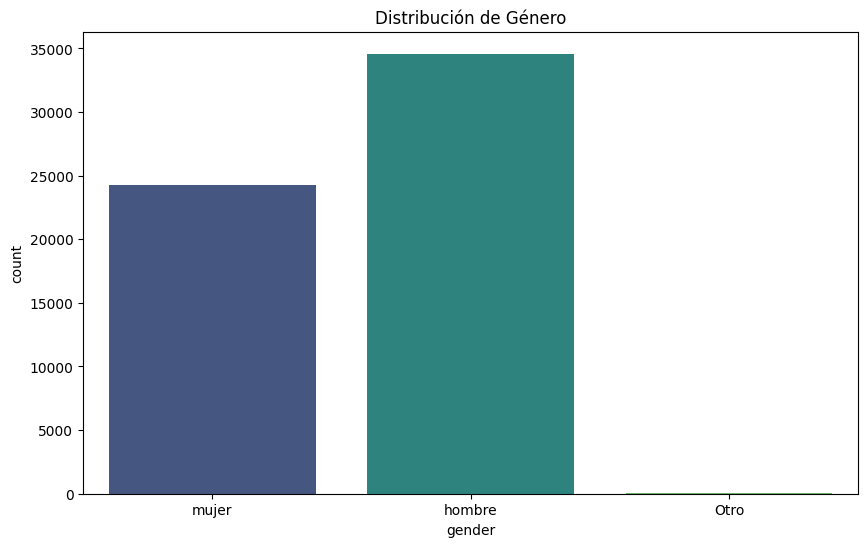

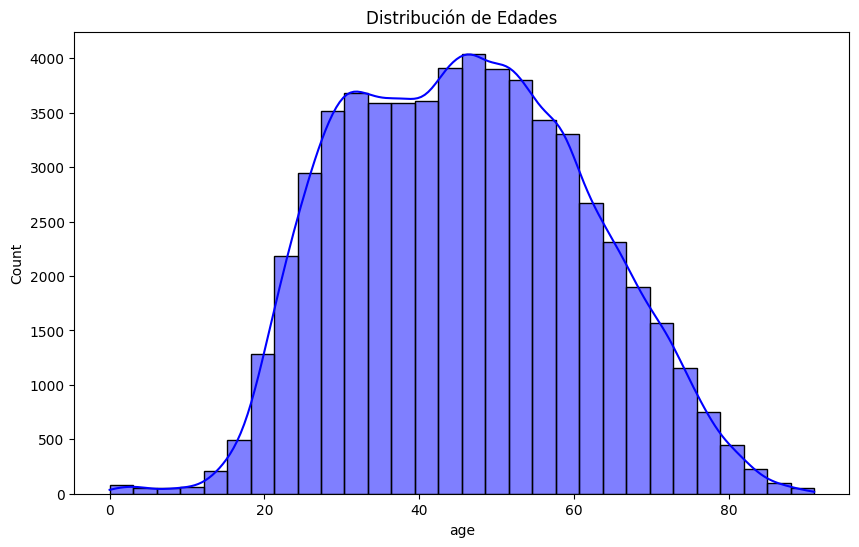

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3886670484.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loyalty_level', y='billing', palette='coolwarm')


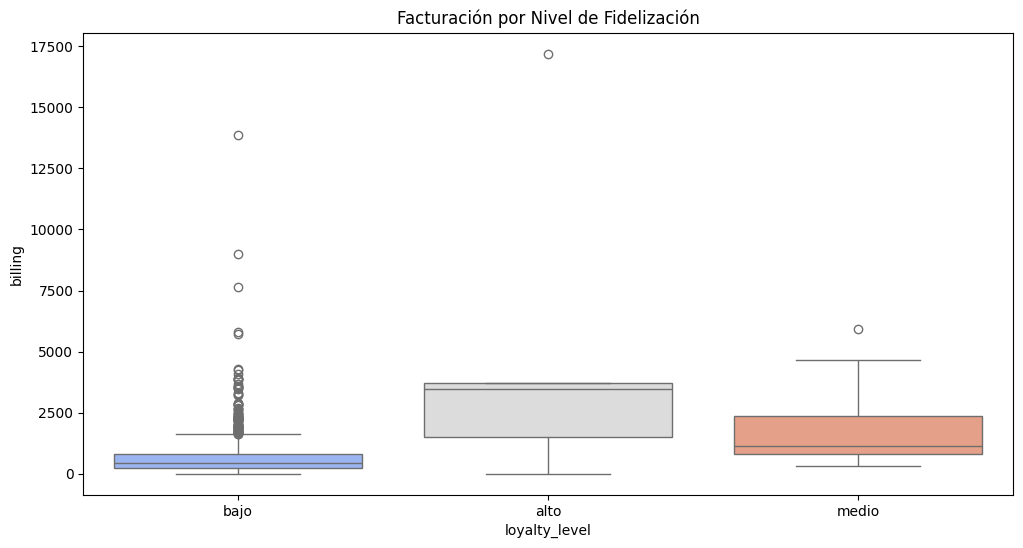

Número de clientes top: 4394
Número de clientes potenciales: 0
Campaña para agradecer a los clientes top
      sequential_id      billing  total_reservations
15        2.635.015   643.983266                   2
32        2.369.625  3918.127857                   2
68        4.891.501   606.664252                   3
90        1.850.768   894.247276                   2
107       1.836.218  2168.974545                   4
...             ...          ...                 ...
99900     4.304.162   895.134663                   3
99933     5.418.010   986.654832                   2
99958     2.717.282   975.512257                   2
99965     5.389.645   866.079575                   3
99987     3.888.140   815.646546                   2

[4394 rows x 3 columns]
Campaña para atraer a clientes potenciales
Empty DataFrame
Columns: [sequential_id, billing, total_reservations]
Index: []


In [61]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset


# Estandarización y limpieza
# Renombrar columnas para que sean más consistentes
df.rename(columns={
    'id_secuencial': 'sequential_id',
    'Idioma': 'language_name',
    'genero': 'gender',
    'tratamiento': 'treatment',
    'alta_cliente': 'customer_signup',
    'comunicaciones_comerciales': 'commercial_communications',
    'alta_comunicaciones': 'communications_signup',
    'nivel_fidelizacion': 'loyalty_level',
    'alta_fidelizacion': 'loyalty_signup',
    'fecha_nacimiento': 'birth_date',
    'mail': 'email',
    'Total_Reservation': 'total_reservations',
    'media_estancia': 'average_stay',
    'antelacion_media': 'average_advance_booking',
    'facturacion': 'billing',
    'Canal_reserva': 'reservation_channel',
    'Motivo_viaje': 'travel_reason',
    'ultima_reserva': 'last_reservation',
    'n_hoteles_distintos': 'different_hotels',
    'acompanante': 'companion'
}, inplace=True)

# Convertir columnas a los tipos adecuados
df['commercial_communications'] = df['commercial_communications'].astype('bool')
df['communications_signup'] = pd.to_datetime(df['communications_signup'], errors='coerce')
df['loyalty_signup'] = pd.to_datetime(df['loyalty_signup'], errors='coerce')
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['last_reservation'] = pd.to_datetime(df['last_reservation'], errors='coerce')

# Crear una columna de edad basada en la fecha de nacimiento
df['age'] = (pd.to_datetime('today') - df['birth_date']).dt.days // 365

# Analizar valores nulos y realizar limpieza
df['commercial_communications'].fillna(False, inplace=True)
df['billing'].fillna(0, inplace=True)
df['different_hotels'].fillna(0, inplace=True)

# Descripción de datos
print(df.describe())

# Análisis gráfico
# Distribución de género
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Distribución de Género')
plt.show()

# Distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='blue')
plt.title('Distribución de Edades')
plt.show()

# Relación entre nivel de fidelización y facturación
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='loyalty_level', y='billing', palette='coolwarm')
plt.title('Facturación por Nivel de Fidelización')
plt.show()

# Segmentación de clientes top y potenciales
# Clientes top: aquellos con mayor facturación y número de reservas
top_clients = df[(df['billing'] > df['billing'].quantile(0.75)) & (df['total_reservations'] > df['total_reservations'].quantile(0.75))]

# Clientes potenciales: aquellos con pocas reservas pero que podrían incrementar su facturación
potential_clients = df[(df['total_reservations'] < df['total_reservations'].quantile(0.25)) & (df['billing'] > df['billing'].quantile(0.75))]

print("Número de clientes top:", top_clients.shape[0])
print("Número de clientes potenciales:", potential_clients.shape[0])

# Propuesta de campañas
# Campaña para agradecer a los clientes top
print("Campaña para agradecer a los clientes top")
print(top_clients[['sequential_id', 'billing', 'total_reservations']])

# Campaña para atraer a clientes potenciales
print("Campaña para atraer a clientes potenciales")
print(potential_clients[['sequential_id', 'billing', 'total_reservations']])

# Guardar resultados en archivos CSV
top_clients.to_csv('top_clients.csv', index=False)
potential_clients.to_csv('potential_clients.csv', index=False)


C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='reservation_channel', palette='Set2')


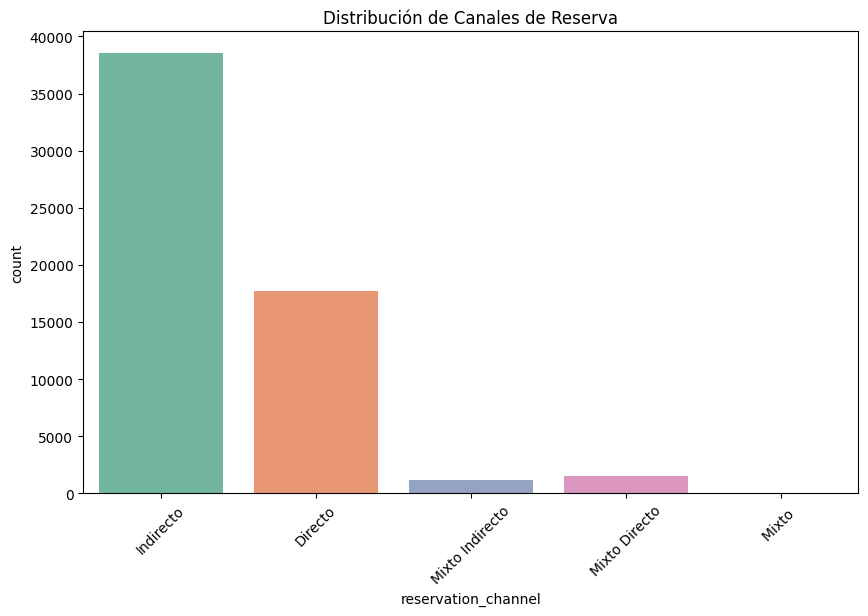

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='travel_reason', palette='Set3')


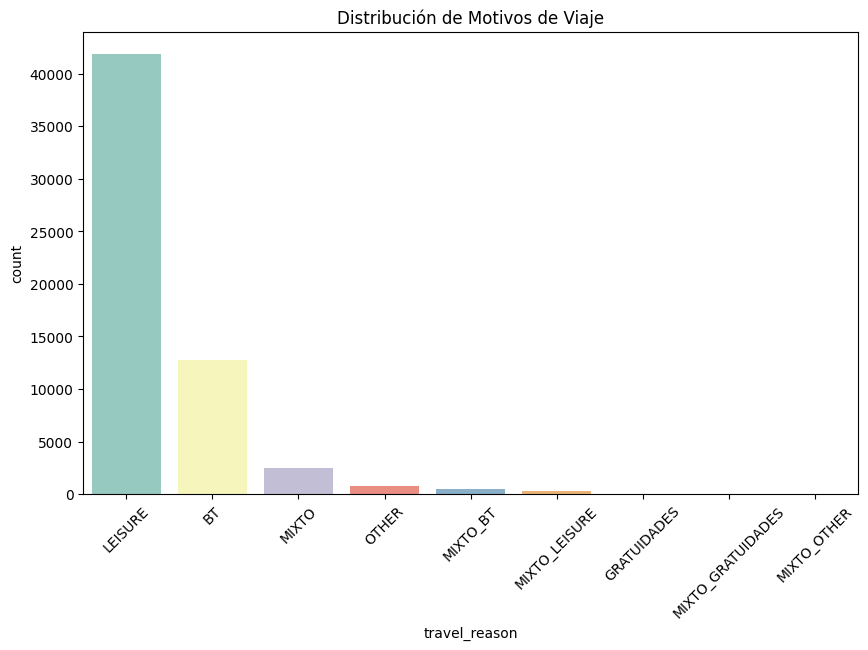

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='billing', palette='Pastel1')


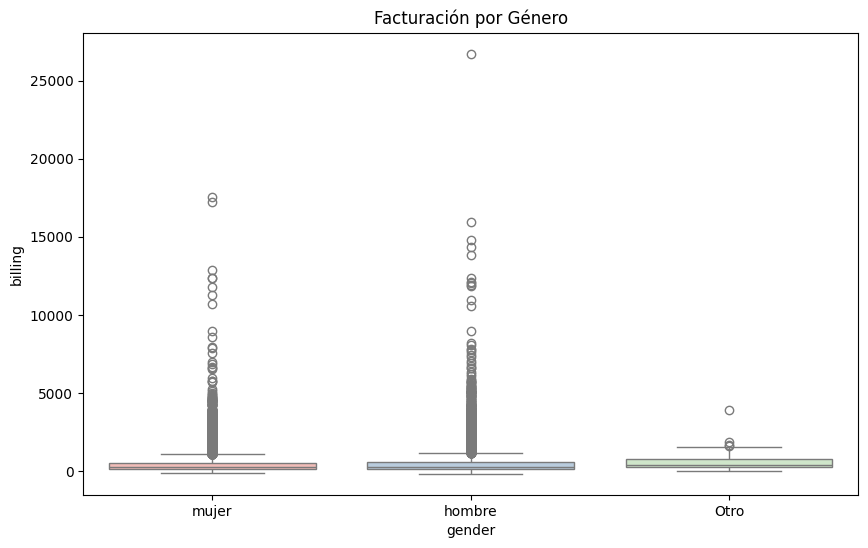

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='reservation_channel', y='billing', palette='Spectral')


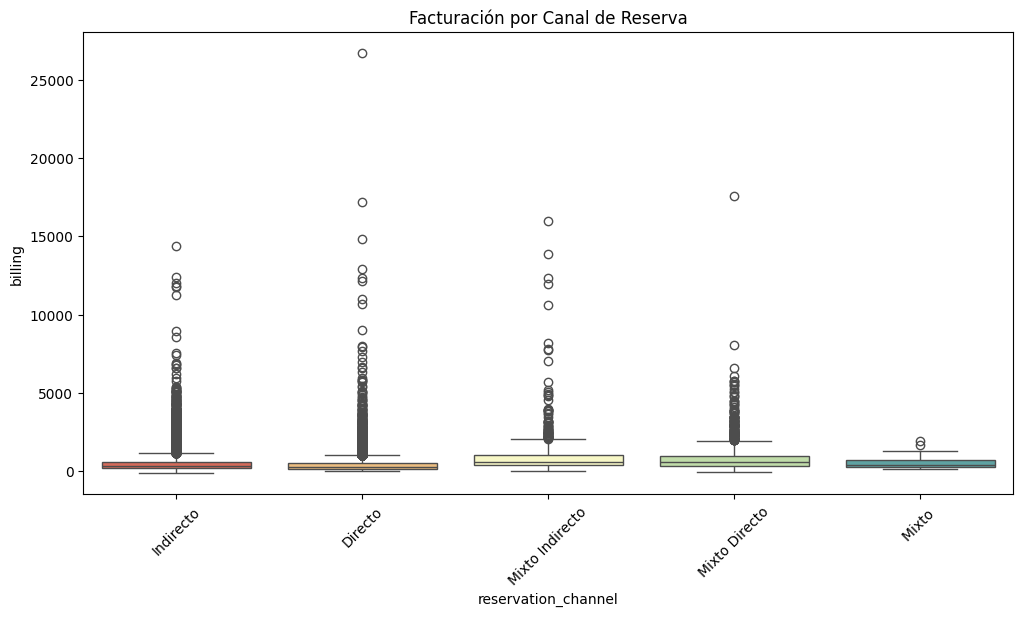

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='travel_reason', y='billing', palette='coolwarm')


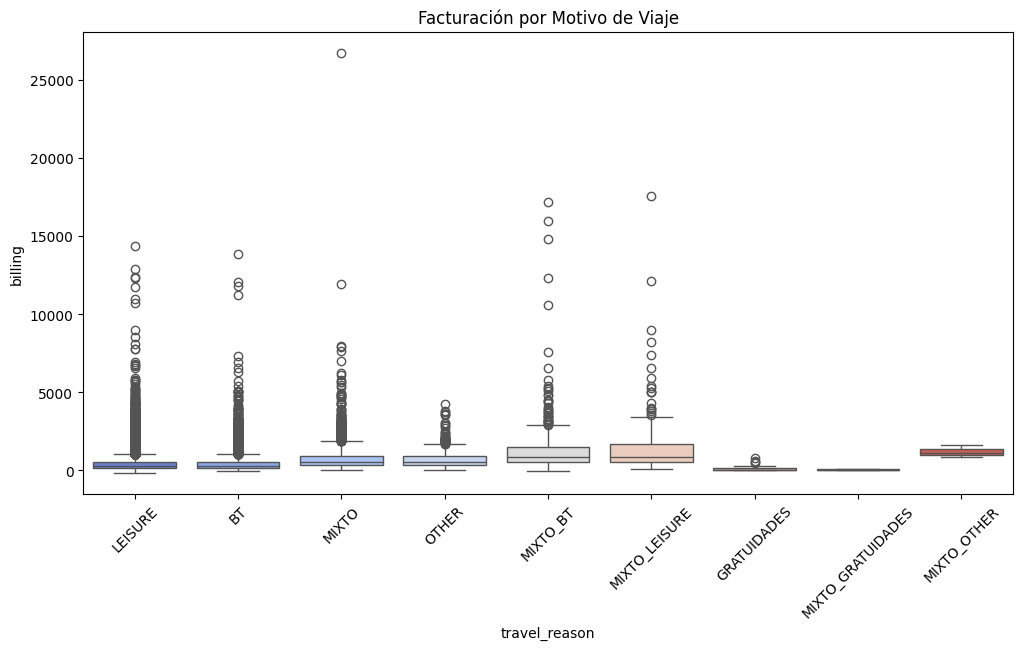

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loyalty_level', y='average_stay', palette='Wistia')


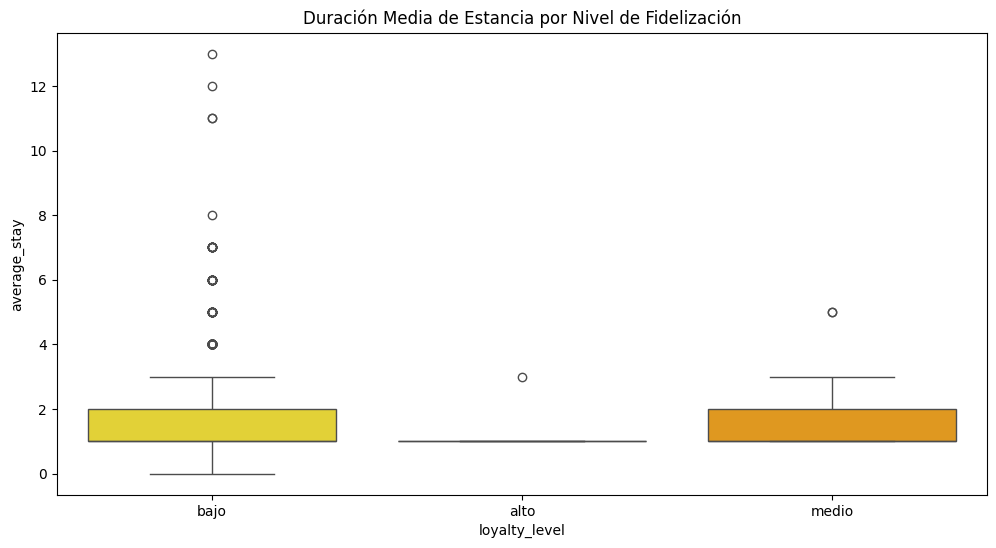

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loyalty_level', y='average_advance_booking', palette='cool')


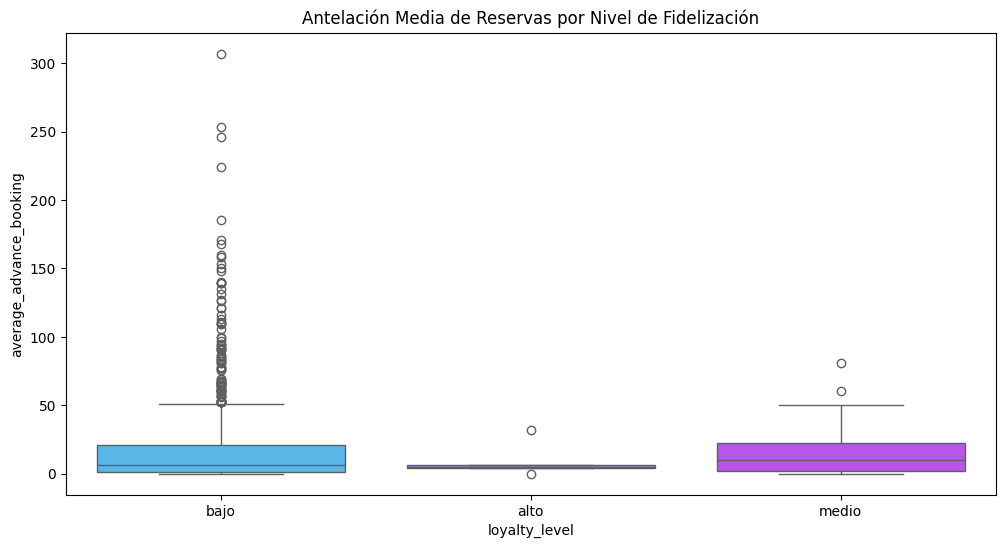

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\1678510779.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='travel_reason', y='different_hotels', palette='viridis')


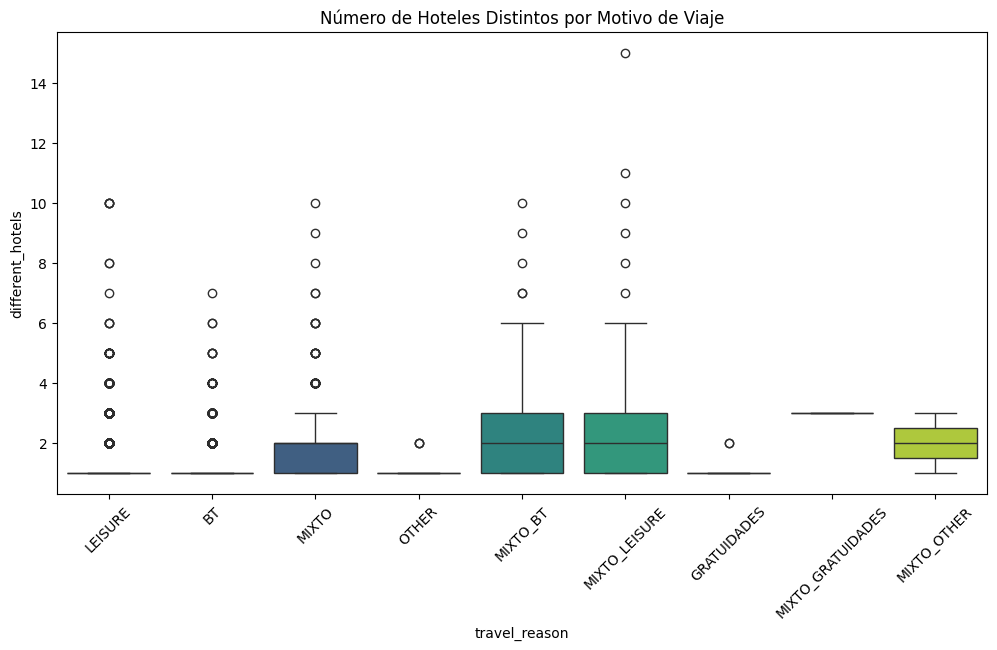

In [62]:
# Gráfica de distribución de canales de reserva
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reservation_channel', palette='Set2')
plt.title('Distribución de Canales de Reserva')
plt.xticks(rotation=45)
plt.show()

# Gráfica de distribución de motivos de viaje
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='travel_reason', palette='Set3')
plt.title('Distribución de Motivos de Viaje')
plt.xticks(rotation=45)
plt.show()

# Gráfica de facturación por género
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='billing', palette='Pastel1')
plt.title('Facturación por Género')
plt.show()

# Gráfica de facturación por canal de reserva
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='reservation_channel', y='billing', palette='Spectral')
plt.title('Facturación por Canal de Reserva')
plt.xticks(rotation=45)
plt.show()

# Gráfica de facturación por motivo de viaje
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='travel_reason', y='billing', palette='coolwarm')
plt.title('Facturación por Motivo de Viaje')
plt.xticks(rotation=45)
plt.show()

# Gráfica de duración media de estancia por nivel de fidelización
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='loyalty_level', y='average_stay', palette='Wistia')
plt.title('Duración Media de Estancia por Nivel de Fidelización')
plt.show()

# Gráfica de antelación media de reservas por nivel de fidelización
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='loyalty_level', y='average_advance_booking', palette='cool')
plt.title('Antelación Media de Reservas por Nivel de Fidelización')
plt.show()

# Gráfica de número de hoteles distintos por motivo de viaje
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='travel_reason', y='different_hotels', palette='viridis')
plt.title('Número de Hoteles Distintos por Motivo de Viaje')
plt.xticks(rotation=45)
plt.show()

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3739796440.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='country', ax=axes[0, 0], palette='Set2')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3739796440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='billing', ax=axes[0, 1], palette='coolwarm')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3739796440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='total_reservations', ax=axes[1, 0], palette='Spectral')
C

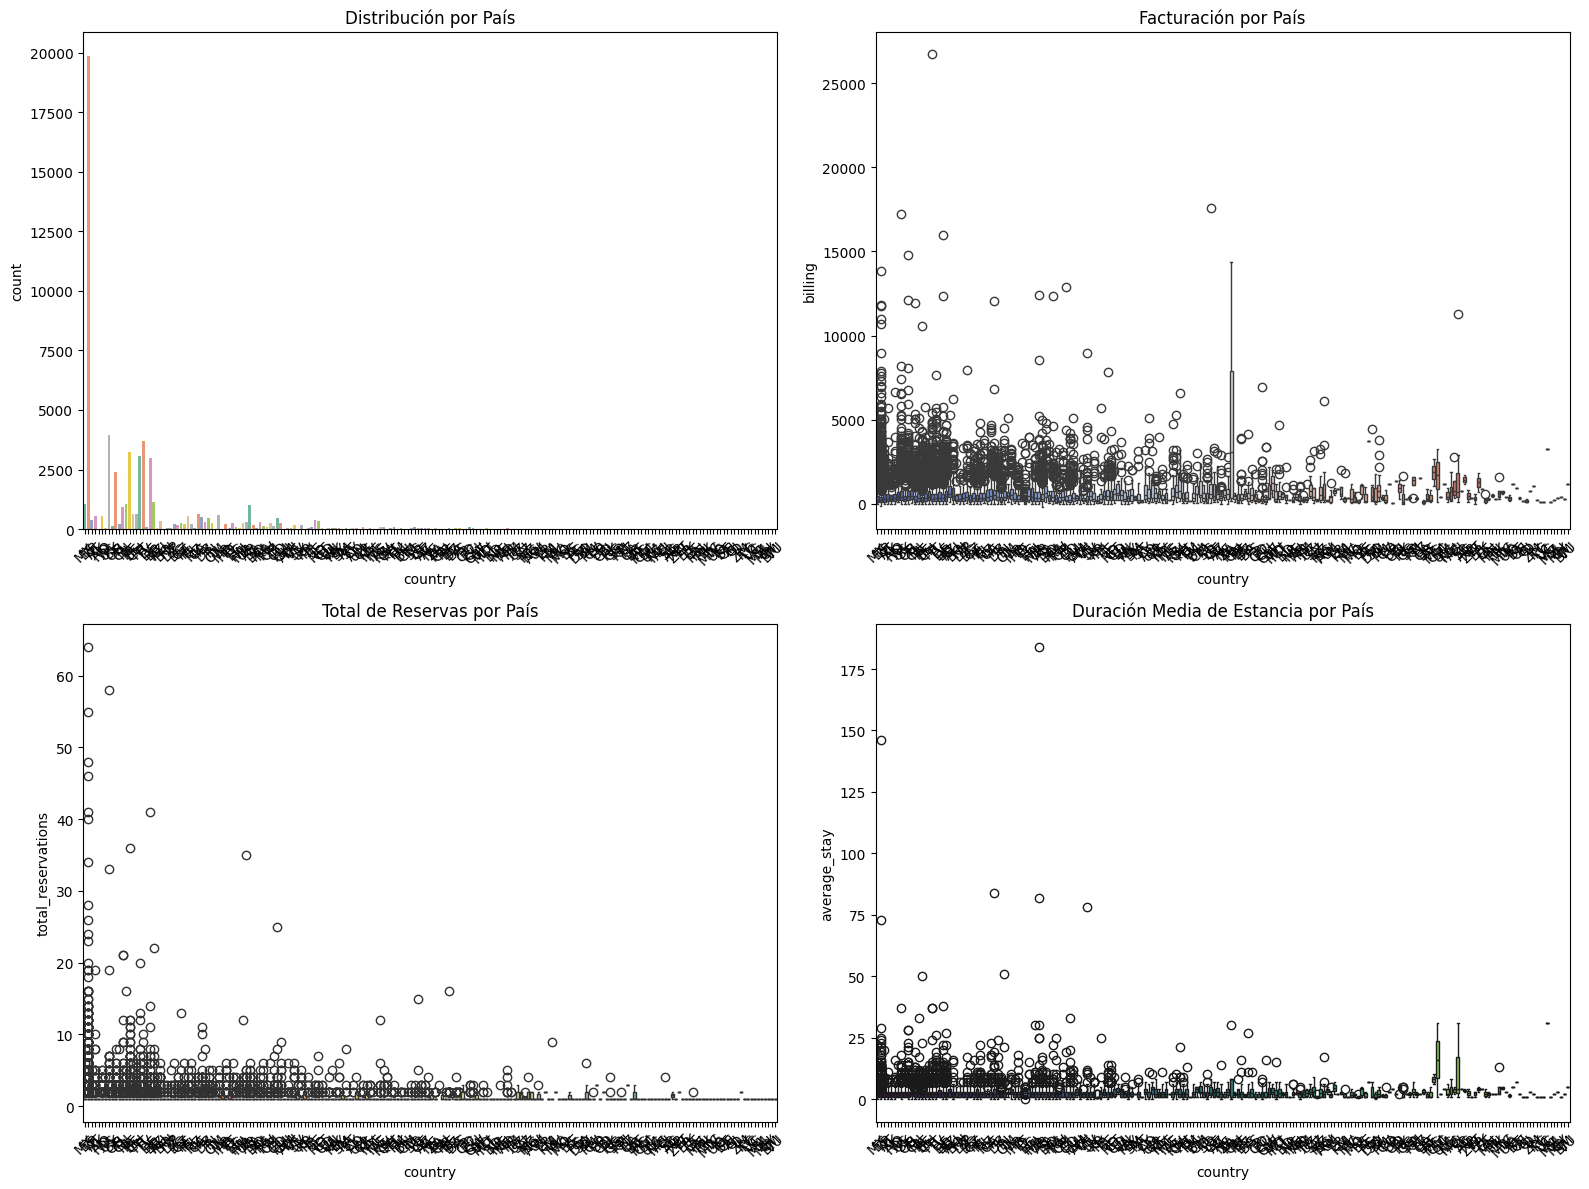

In [63]:
# Gráficas agrupadas por país
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df, x='country', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribución por País')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='country', y='billing', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Facturación por País')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='country', y='total_reservations', ax=axes[1, 0], palette='Spectral')
axes[1, 0].set_title('Total de Reservas por País')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='country', y='average_stay', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Duración Media de Estancia por País')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3545427699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axes[0, 0], palette='Set2')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3545427699.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='billing', ax=axes[0, 1], palette='coolwarm')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\3545427699.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='total_reservations', ax=axes[1, 0], palette='Spectral')
C:\U

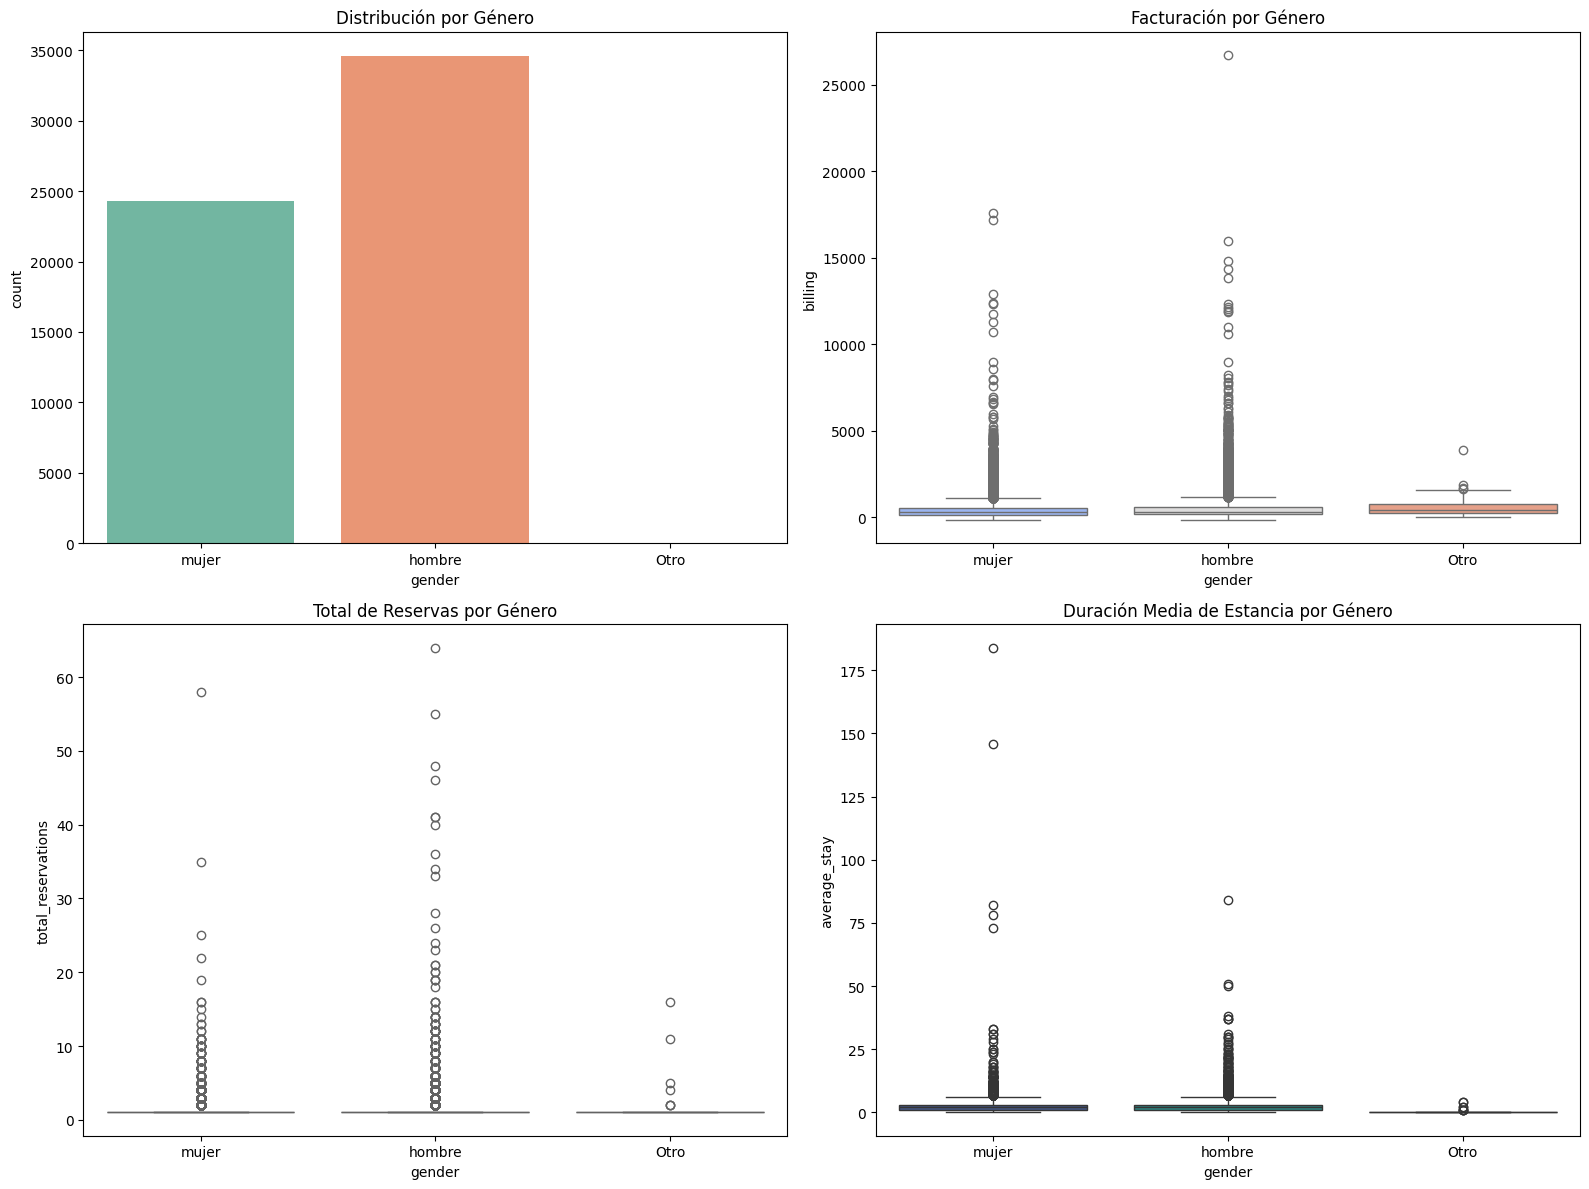

In [64]:
# Gráficas agrupadas por género
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df, x='gender', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribución por Género')

sns.boxplot(data=df, x='gender', y='billing', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Facturación por Género')

sns.boxplot(data=df, x='gender', y='total_reservations', ax=axes[1, 0], palette='Spectral')
axes[1, 0].set_title('Total de Reservas por Género')

sns.boxplot(data=df, x='gender', y='average_stay', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Duración Media de Estancia por Género')

plt.tight_layout()
plt.show()


C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\4071862130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age', y='billing', ax=axes[0, 1], palette='coolwarm')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\4071862130.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age', y='total_reservations', ax=axes[1, 0], palette='Spectral')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\4071862130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age', y='average_stay', ax=axes[1, 1], palette='vir

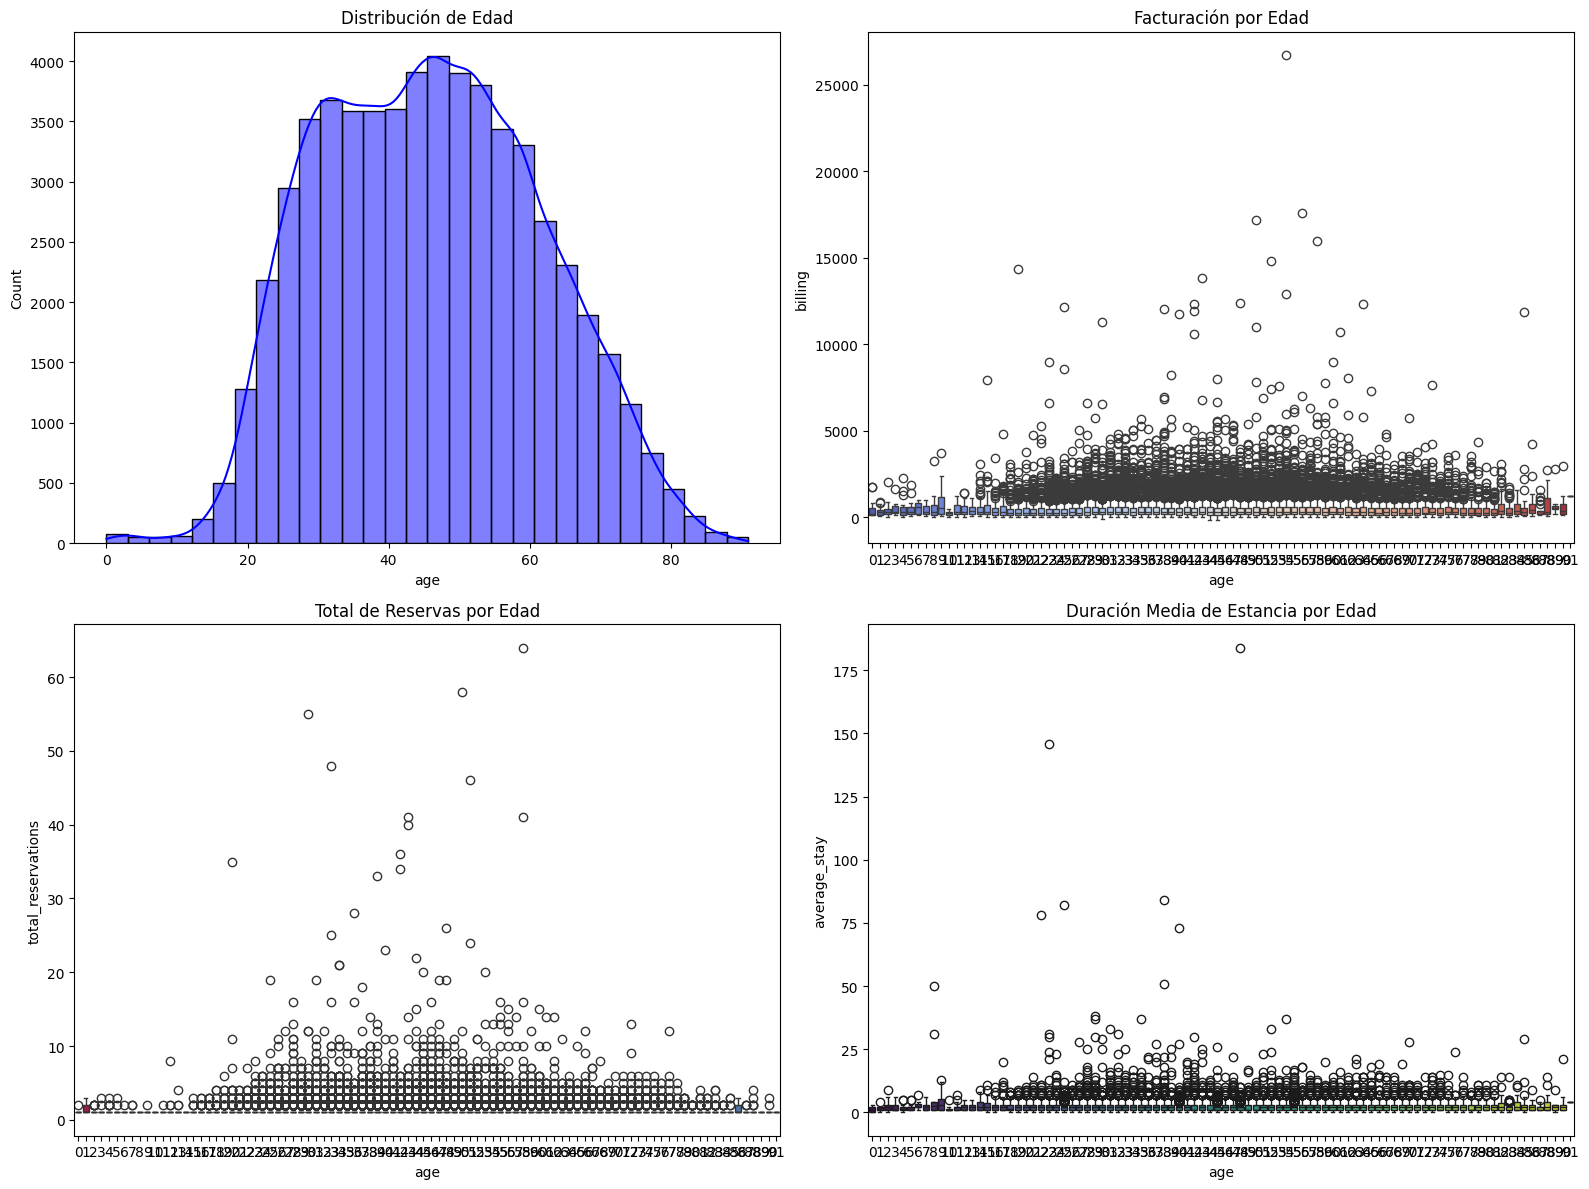

In [65]:
# Gráficas agrupadas por edad
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data=df, x='age', bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribución de Edad')

sns.boxplot(data=df, x='age', y='billing', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Facturación por Edad')

sns.boxplot(data=df, x='age', y='total_reservations', ax=axes[1, 0], palette='Spectral')
axes[1, 0].set_title('Total de Reservas por Edad')

sns.boxplot(data=df, x='age', y='average_stay', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Duración Media de Estancia por Edad')

plt.tight_layout()
plt.show()


C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\750939878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loyalty_level', ax=axes[0, 0], palette='Set2')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\750939878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loyalty_level', y='billing', ax=axes[0, 1], palette='coolwarm')
C:\Users\adrif\AppData\Local\Temp\ipykernel_14084\750939878.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loyalty_level', y='average_stay', ax=axes[1, 1], palette='vir

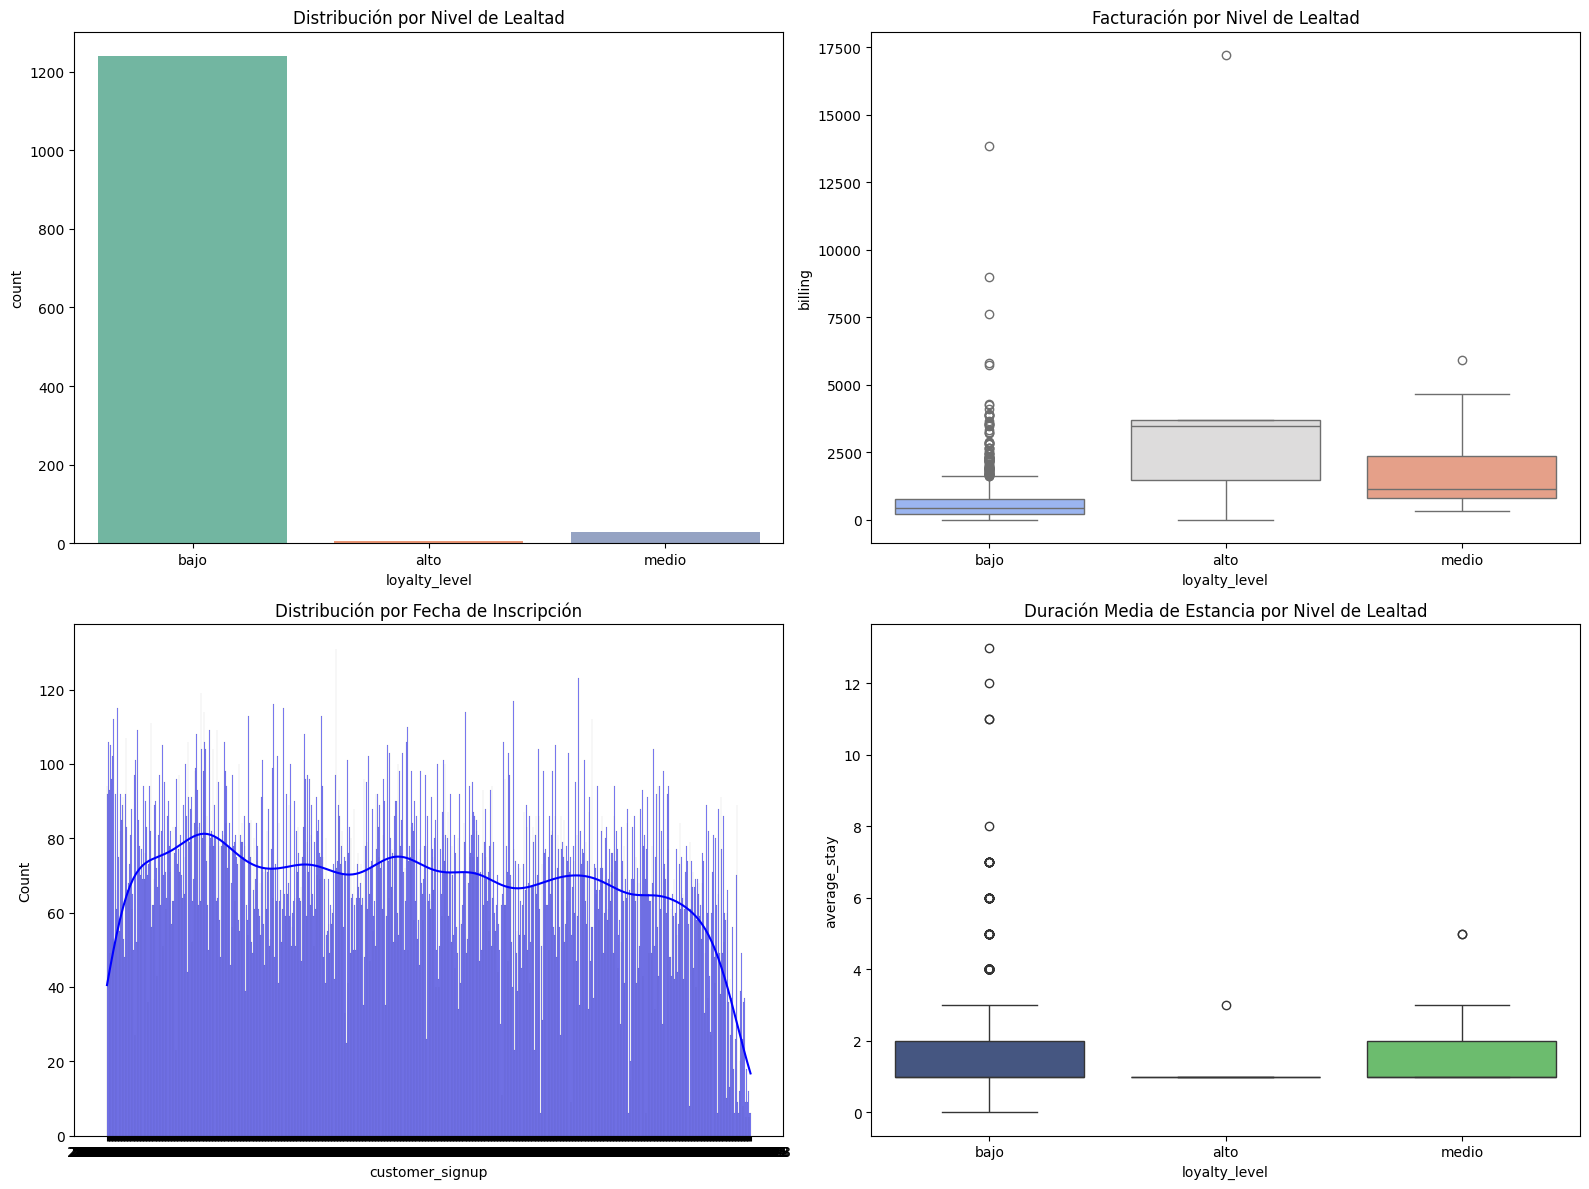

In [66]:
# Gráficas agrupadas por nivel de lealtad y fecha de inscripción
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df, x='loyalty_level', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribución por Nivel de Lealtad')

sns.boxplot(data=df, x='loyalty_level', y='billing', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Facturación por Nivel de Lealtad')

sns.histplot(data=df, x='customer_signup', bins=30, kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Distribución por Fecha de Inscripción')

sns.boxplot(data=df, x='loyalty_level', y='average_stay', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Duración Media de Estancia por Nivel de Lealtad')

plt.tight_layout()
plt.show()


In [67]:
df.to_csv('./data/EXPPBI.csv', index=False)